**퍼셉트론 수렴 정리** : 선형 분리 가능 문제는 데이터로부터 유한한 학습을 통해 해결 가능하지만, 비선형 분리 문제는 불가능

**end-to-end** : 머신러닝에서 입력 데이터(처음)부터 목표한 결과(끝)까지 사람의 개입 없이 학습하는 방식 ; 딥러닝

In [27]:
import numpy as np

In [28]:
# 데이터 하나에 대한 손실 함수

# 오차제곱합
def sum_squares_error(y_pred,y_test):
    return 0.5*np.sum((y_pred-y_test)**2)

# 크로스엔트로피
def cross_entropy_error(y_pred,y_test):
    delta = 1e-7 # 예측 확률이 0인 클래스가 실제 정답일 경우 무한대 발산 예방
    return -np.sum(y_test*np.log(y_pred+delta))

**미니배치** : 훈련 데이터의 일부를 무작위 추출

In [29]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train.reshape(60000,784)
y_train = y_train.reshape(60000,)
x_test = x_test.reshape(10000,784)
y_test = y_test.reshape(10000,)

In [30]:
import pandas as pd

In [31]:
# 원핫 인코딩
y_train = pd.get_dummies(y_train).to_numpy()
y_test = pd.get_dummies(y_test).to_numpy()
print(y_train.shape, y_test.shape)

(60000, 10) (10000, 10)


In [32]:
# 무작위 10개 추출
train_size = x_train.shape[0]
batch_size = 10
# [0,train_size) 정수 범위에서 batch_size개 무작위 추출
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

In [33]:
# 배치 크로스엔트로피 ; 원핫 인코딩된 y_test
def cross_entropy_error(y_pred,y_test):
    if y_pred.ndim==1: # 데이터가 하나인 경우,
        y_test = y_test.reshape(1,-1) # 2차원으로 변환
        y_pred = y_pred.reshape(1,-1)
    batch_size = y_pred.shape[0]
    return -np.sum(y_test*np.log(y_pred+1e-7))/batch_size

In [34]:
# 배치 크로스엔트로피 ; 레이블 인코딩된 y_test
def cross_entropy_error(y_pred,y_test):
    if y_pred.ndim==1: # 데이터가 하나인 경우,
        y_test = y_test.reshape(1,-1) # 2차원으로 변환
        y_pred = y_pred.reshape(1,-1)
    batch_size = y_pred.shape[0]
    return -np.sum(np.log(y_pred[np.arange(batch_size),y_test]+1e-7))/batch_size

**gradient descent**

In [35]:
def obj_f(x):
    return x[0]**2+x[1]**2

def num_grad(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for i in range(x.size):
        tmp = x[i] # 편미분 변수 x 고정

        x[i] = tmp+h
        fph = f(x) # f(x+h)

        x[i] = tmp-h
        fnh = f(x) # f(x-h)

        grad[i] = (fph-fnh)/(2*h)
        x[i] = tmp
    return grad

def grad_des(f,init_x,lr=0.01,step_num=100): # 경사 하강
    x = init_x
    for _ in range(step_num):
        x -= lr*num_grad(f,x)
    return x

for lr in [1e-10, 0.01, 0.1, 1.0, 10.0]: # 학습률에 따른 결과
    init_x = np.array([-3.0,4.0])
    print(grad_des(f=obj_f,init_x=init_x,lr=lr,step_num=100))
# f(a,b) = a**2 + b**2 는 (a,b)=(0,0) 에서 최솟값 0을 가지므로 학습률 0.1이 가장 적절함

[-2.99999994  3.99999992]
[-0.39785867  0.53047822]
[-6.11110793e-10  8.14814391e-10]
[-3.  4.]
[-2.58983747e+13 -1.29524862e+12]


In [36]:
# 구글드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
# change directory
%cd '/content/drive/MyDrive/연구실/Deep Learning from scratch 1/deep-learning-from-scratch'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/연구실/Deep Learning from scratch 1/deep-learning-from-scratch


In [37]:
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient

In [38]:
class simpleNet: # 클래스 내에서 정의되는 함수는 메서드가 되고, 메서드 사용(해당 클래스의 인스턴스만 가능)에서 self 인자는 생략
    def __init__(self): # 클래스 내 속성을 초기화하는 함수(메서드)
        self.W = np.random.randn(2,3) # simpleNet 클래스의 속성 W를 shape이 (2,3)인 표준정규분포의 난수로 초기화
    
    def predict(self,x): # 입력
        return np.dot(x,self.W) # 예측 반환
    
    def loss(self,x,t): # 입력, 정답
        z = self.predict(x)
        y = softmax(z) # 예측 확률
        loss = cross_entropy_error(y,t)
        return loss # 손실 반환

In [39]:
net = simpleNet()
print(net.W) # 초기화된 가중치 매개변수

x = np.array([.6,.9]) # 입력
p = net.predict(x)
print(p) # 예측(클래스별 점수)
print(np.argmax(p)) # 점수가 가장 큰 클래스의 위치

t = np.array([0,0,1]) # 정답(원핫 인코딩)
print(net.loss(x,t)) # 손실

[[ 1.08841948  1.72164175 -0.57112061]
 [-0.22618158 -0.84832457  0.88107264]]
[0.44948827 0.26949294 0.45029301]
2
1.0416175008728223


In [40]:
f = lambda W: net.loss(x,t) # 가중치 행렬 W에 대한 손실 함수

dW = numerical_gradient(f, net.W) # 가중치 행렬 W에 대한 손실 함수의 기울기(편미분)
print(dW)

[[ 0.21155962  0.17671027 -0.38826989]
 [ 0.31733943  0.26506541 -0.58240484]]


In [41]:
# SGD로 MNIST 손글씨 분류 모델

# 2층 신경망 클래스
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy

    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

In [42]:
# 미니배치 학습
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet
from tqdm import tqdm
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch) # 미니배치에 대한 손실
    train_loss_list.append(loss)

100%|██████████| 10000/10000 [00:41<00:00, 243.27it/s]


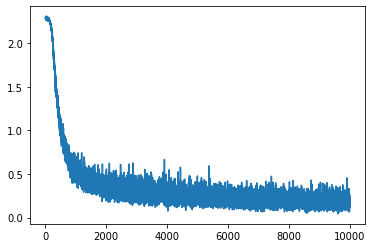

In [43]:
import matplotlib.pyplot as plt
plt.plot(train_loss_list);

**epoch** : 학습 과정에서 훈련 데이터 전체에 대한 순회 단위
- 경사 하강을 위해 랜덤 추출된 모든 미니배치에 중복되거나 누락된 훈련 데이터 샘플이 있더라도 batch size를 통해 1 epoch의 경사 하강 횟수를 결정

In [44]:
# 미니배치 학습
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet
from tqdm import tqdm
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size/batch_size, 1) # 600

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) # 성능 개선
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch) # 미니배치에 대한 손실
    train_loss_list.append(loss)

    # 1 epoch 학습마다 정확도 출력
    if i%iter_per_epoch==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('train acc, test acc | ' + str(train_acc) + ', ' + str(test_acc))

  0%|          | 33/10000 [00:00<03:09, 52.54it/s] 

train acc, test acc | 0.10218333333333333, 0.101


  6%|▌         | 622/10000 [00:04<02:21, 66.41it/s]

train acc, test acc | 0.7929166666666667, 0.7971


 12%|█▏        | 1216/10000 [00:09<02:21, 62.18it/s]

train acc, test acc | 0.8768666666666667, 0.8811


 18%|█▊        | 1808/10000 [00:17<12:59, 10.51it/s]

train acc, test acc | 0.89835, 0.9013


 24%|██▍       | 2434/10000 [00:24<01:24, 89.83it/s]

train acc, test acc | 0.9071333333333333, 0.9119


 30%|███       | 3037/10000 [00:27<01:00, 115.77it/s]

train acc, test acc | 0.9156166666666666, 0.917


 36%|███▌      | 3617/10000 [00:33<02:56, 36.09it/s] 

train acc, test acc | 0.9209, 0.9223


 42%|████▏     | 4226/10000 [00:41<01:45, 54.53it/s]

train acc, test acc | 0.9251666666666667, 0.9268


 48%|████▊     | 4833/10000 [00:45<00:40, 126.49it/s]

train acc, test acc | 0.9289, 0.9307


 55%|█████▍    | 5460/10000 [00:48<00:35, 129.39it/s]

train acc, test acc | 0.9327, 0.9337


 60%|██████    | 6017/10000 [00:54<02:48, 23.70it/s]

train acc, test acc | 0.9359833333333333, 0.9367


 66%|██████▋   | 6647/10000 [00:59<00:34, 98.19it/s]

train acc, test acc | 0.9373666666666667, 0.9375


 72%|███████▏  | 7225/10000 [01:04<01:04, 42.99it/s]

train acc, test acc | 0.94005, 0.9407


 78%|███████▊  | 7820/10000 [01:13<00:41, 52.70it/s] 

train acc, test acc | 0.9418833333333333, 0.9423


 84%|████████▍ | 8402/10000 [01:16<00:36, 43.46it/s] 

train acc, test acc | 0.9442666666666667, 0.9443


 90%|█████████ | 9018/10000 [01:23<00:38, 25.55it/s]

train acc, test acc | 0.94625, 0.946


 96%|█████████▌| 9624/10000 [01:29<00:05, 68.73it/s]

train acc, test acc | 0.9479666666666666, 0.9463


100%|██████████| 10000/10000 [01:31<00:00, 109.25it/s]


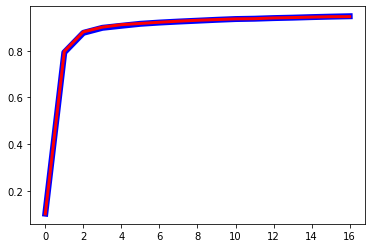

In [45]:
plt.plot(train_acc_list, linewidth=6, c='b')
plt.plot(test_acc_list, linewidth=3, c='r');

**계층** : 신경망의 기능 단위
- 클래스로 구현 : forward (순전파) / backward (역전파)

In [46]:
# 곱셈 계층
class MulLayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        return out
    
    def backward(self, dout): # dout : 상류로부터 받은 미분
        dx = dout * self.y
        dy = dout * self.x
        return dx, dy

# 사과 쇼핑 구현
apple = 100 # 사과 1개 가격
apple_num = 2 # 사과 개수
tax = 1.1 # 사과 소비세

mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)
print(price)

# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dtax)

220.00000000000003
2.2 110.00000000000001 200


In [47]:
# 덧셈 계층
class AddLayer:
    def __init__(self):
        pass
    
    def forward(self, x, y):
        out = x + y
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

# 사과와 오렌지 쇼핑 구현
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)
print(price)

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)
dorange, dorange_num = mul_orange_layer.backward(dorange_price)
dapple, dapple_num = mul_apple_layer.backward(dapple_price)
print(dapple, dapple_num, dorange, dorange_num, dtax)

715.0000000000001
2.2 110.00000000000001 3.3000000000000003 165.0 650


**어파인 변환** : 신경망의 순전파에서 수행하는 행렬의 곱 ; 행렬의 shape에 맞춰 연결하는 것이 중요

In [48]:
# 배치용 Affine 계층 예시
# 순전파
X_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])
print(X_dot_W + B)

# 역전파
dY = np.array([[1,2,3],[4,5,6]])
dB = np.sum(dY, axis=0) # 편향의 역전파 : 배치 합
print(dB)

[[ 1  2  3]
 [11 12 13]]
[5 7 9]


In [49]:
# ReLU 계층
class Relu:
    def __init__(self):
        self.mask = None
    
    def forward(self, x):
        self.mask = (x<=0)
        out = x.copy()
        out[self.mask] = 0
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx

# Sigmoid 계층
class Sigmoid:
    def __init__(self):
        self.out = None
    
    def forward(self, x):
        out = 1 / (1+np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * self.out * (1.0-self.out)
        return dx

# Affine 계층
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b
        self.x = None
        self.dW = None
        self.db = None

    def forward(self, x):
        self.x = x
        out = np.dot(x, self.W) + self.b
        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)
        return dx

# Softmax-with-Loss 계층
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None
        self.y = None
        self.t = None

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t) # 배치 크로스엔트로피
        return self.loss
    
    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        dx = (self.y - self.t) / batch_size # 배치 단위의 계산을 위해 데이터 샘플 1개 기준의 미분으로 역전파
        return dx

**계산 그래프**
- ex. Softmax-with-Loss 계층 (역전파 과정에서 여러 갈래로부터 역류한 값은 더하여 계산)

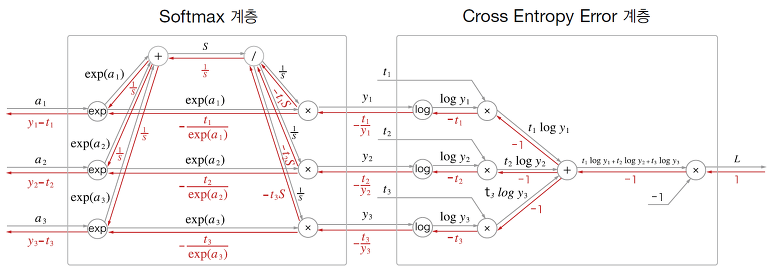

손실함수로 분류에서 크로스엔트로피, 회귀에서 오차제곱합을 사용한 역전파의 결과 $\rightarrow$ 오차
> $Y-T = (y_1-t_1, ..., y_m-t_m)$  (단, Y는 예측, T는 정답, m은 분류 클래스의 개수)

**오차역전파법**

In [50]:
from common.layers import * # 구현된 계층 사용
from common.gradient import numerical_gradient
from collections import OrderedDict # 순서 딕셔너리로 신경망 계층을 저장

class TwoLayerNet:
    def __init(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치, 편향
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        # 계층
        self.layers = OrderedDict()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W2'], self.params['b2'])
        self.lastLayer = SoftmaxWithLoss()
    
    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)
        return x
    
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim!=1: # 정답이 원핫 인코딩된 경우
            t = np.argmax(t, axis=1)
        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t): # 수치 미분 방식으로 기울기 계산
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads # 기울기 확인(검증) : 오차역전파법에 의한 결과와 비교
    
    def gradient(self, x, t): # 오차역전파법으로 기울기 계산
        # 순전파
        self.loss(x, t)
        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)
        layers = list(self.layers.values())
        layers.reverse() # 순서 딕셔너리에 저장된 계층을 역순으로 전파
        for layer in layers:
            dout = layer.backward(dout)
        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db
        return grads

In [54]:
# 기울기 확인
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치와 편향에 대하여, 두 방식으로 계산된 기울기의 평균 차이를 계산
for key in grad_numerical.keys(): # W1, b1, W2, b2
    diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key]))
    print(key + ':' + str(diff))

W1:3.799881943053894e-10
b1:2.2880455596971037e-09
W2:5.708994533284374e-09
b2:1.3989752751658592e-07


In [59]:
# 신경망 학습 최종 구현
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet
from tqdm import tqdm
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=75, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 150
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if i%iter_per_epoch==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print('\n', f'iteration : {i} >>> train accuracy : {train_acc} | test accuracy : {test_acc}')

  0%|          | 17/10000 [00:01<07:50, 21.20it/s] 


 iteration : 0 >>> train accuracy : 0.10941666666666666 | test accuracy : 0.1134


  4%|▍         | 414/10000 [00:06<06:52, 23.23it/s]


 iteration : 400 >>> train accuracy : 0.8918666666666667 | test accuracy : 0.8974


  8%|▊         | 825/10000 [00:10<02:06, 72.51it/s]


 iteration : 800 >>> train accuracy : 0.9123833333333333 | test accuracy : 0.9136


 12%|█▏        | 1220/10000 [00:13<02:12, 66.12it/s]


 iteration : 1200 >>> train accuracy : 0.9245333333333333 | test accuracy : 0.926


 16%|█▌        | 1622/10000 [00:16<01:59, 70.00it/s]


 iteration : 1600 >>> train accuracy : 0.9327 | test accuracy : 0.9328


 20%|██        | 2016/10000 [00:22<05:42, 23.29it/s]


 iteration : 2000 >>> train accuracy : 0.9410666666666667 | test accuracy : 0.9396


 24%|██▍       | 2430/10000 [00:26<01:48, 69.97it/s]


 iteration : 2400 >>> train accuracy : 0.9469833333333333 | test accuracy : 0.9458


 28%|██▊       | 2822/10000 [00:29<01:41, 70.61it/s]


 iteration : 2800 >>> train accuracy : 0.9517833333333333 | test accuracy : 0.9495


 32%|███▏      | 3233/10000 [00:32<01:36, 70.06it/s]


 iteration : 3200 >>> train accuracy : 0.95675 | test accuracy : 0.9541


 36%|███▋      | 3625/10000 [00:38<03:08, 33.82it/s]


 iteration : 3600 >>> train accuracy : 0.9604833333333334 | test accuracy : 0.9564


 40%|████      | 4019/10000 [00:41<01:26, 68.75it/s]


 iteration : 4000 >>> train accuracy : 0.9633833333333334 | test accuracy : 0.9595


 44%|████▍     | 4424/10000 [00:44<01:20, 69.15it/s]


 iteration : 4400 >>> train accuracy : 0.9652333333333334 | test accuracy : 0.9608


 48%|████▊     | 4822/10000 [00:47<01:15, 68.30it/s]


 iteration : 4800 >>> train accuracy : 0.9677833333333333 | test accuracy : 0.9633


 52%|█████▏    | 5225/10000 [00:53<02:15, 35.28it/s]


 iteration : 5200 >>> train accuracy : 0.9703833333333334 | test accuracy : 0.9655


 56%|█████▌    | 5619/10000 [00:56<01:04, 67.84it/s]


 iteration : 5600 >>> train accuracy : 0.97075 | test accuracy : 0.9645


 60%|██████    | 6027/10000 [00:59<00:56, 69.91it/s]


 iteration : 6000 >>> train accuracy : 0.9735666666666667 | test accuracy : 0.9666


 64%|██████▍   | 6429/10000 [01:03<00:51, 68.90it/s]


 iteration : 6400 >>> train accuracy : 0.9754 | test accuracy : 0.9687


 68%|██████▊   | 6824/10000 [01:08<01:22, 38.31it/s]


 iteration : 6800 >>> train accuracy : 0.9758166666666667 | test accuracy : 0.9698


 72%|███████▏  | 7229/10000 [01:12<00:42, 64.54it/s]


 iteration : 7200 >>> train accuracy : 0.97735 | test accuracy : 0.9691


 76%|███████▋  | 7626/10000 [01:15<00:36, 64.39it/s]


 iteration : 7600 >>> train accuracy : 0.9786 | test accuracy : 0.9701


 80%|████████  | 8011/10000 [01:19<00:43, 45.54it/s] 


 iteration : 8000 >>> train accuracy : 0.979 | test accuracy : 0.9718


 84%|████████▍ | 8426/10000 [01:24<00:28, 55.21it/s]


 iteration : 8400 >>> train accuracy : 0.9795666666666667 | test accuracy : 0.9714


 88%|████████▊ | 8821/10000 [01:28<00:16, 71.52it/s]


 iteration : 8800 >>> train accuracy : 0.9807333333333333 | test accuracy : 0.9714


 92%|█████████▏| 9220/10000 [01:31<00:12, 64.25it/s]


 iteration : 9200 >>> train accuracy : 0.9818166666666667 | test accuracy : 0.9741


 96%|█████████▌| 9616/10000 [01:35<00:09, 41.01it/s]


 iteration : 9600 >>> train accuracy : 0.9831166666666666 | test accuracy : 0.9736


100%|██████████| 10000/10000 [01:39<00:00, 100.46it/s]
